# Production Version Classifier

In [1]:
import os
import sys
import pandas as pd
import matplotlib
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings("ignore")

In [2]:
%pylab inline
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.which'] = 'both'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['axes.titlesize'] = 24

Populating the interactive namespace from numpy and matplotlib


In [3]:
import mining
import dtw
import general
import ajax
import views
import mva

## Pre-Process the new data

In [4]:
general.data_path = 'new_data/'
df = mining.preprocess_data(save_csv=False)
df


Ajax Mining for : new_data/day_2016-02-22 - 2016-02-23/ajax_events.csv
Ajax Mining for : new_data/day_2016-02-23 - 2016-02-24/ajax_events.csv
Ajax Mining for : new_data/day_2016-02-24 - 2016-02-25/ajax_events.csv
Ajax Mining for : new_data/day_2016-02-25 - 2016-02-26/ajax_events.csv
Ajax Mining for : new_data/day_2016-02-26 - 2016-02-27/ajax_events.csv
Ajax Mining for : new_data/day_2016-02-27 - 2016-02-28/ajax_events.csv
Ajax Mining for : new_data/day_2016-02-28 - 2016-02-29/ajax_events.csv
Ajax Mining for : new_data/day_2016-02-29 - 2016-03-01/ajax_events.csv
View Mining for : new_data/day_2016-02-22 - 2016-02-23/views.csv
View Mining for : new_data/day_2016-02-23 - 2016-02-24/views.csv
View Mining for : new_data/day_2016-02-24 - 2016-02-25/views.csv
View Mining for : new_data/day_2016-02-25 - 2016-02-26/views.csv
View Mining for : new_data/day_2016-02-26 - 2016-02-27/views.csv
View Mining for : new_data/day_2016-02-27 - 2016-02-28/views.csv
View Mining for : new_data/day_2016-02-28 

,Success,Fail,Views,FailAvgDuration,SuccessAvgDuration,TotalAvgDuration,Start_Time,End_Time,AvgSessionDuration,Sessions,RatioFS,RatioFV
5.0.302.270 (production#bc7f456.160202-1806),0,200,0,270.475006,212.800003,270.475006,2016-02-22,2016-03-01,23757.449219,8,200000.000000,200000.000000
5.0.302.284 (production#384b804.160222-1016),575,9,825,363.333344,30.277779,30.277779,2016-02-22,2016-02-25,1637.725952,84,0.015652,0.010909
5.0.302.283 (production#6147f30.160218-1327),199972,1343,232867,11429.632812,135.683334,193.220627,2016-02-22,2016-03-01,635.901855,26410,0.006716,0.005767
5.0.302.286 (production#d9693cf.160224-1622),138959,794,155108,13839.983398,356.394043,415.046722,2016-02-25,2016-03-01,721.029907,19546,0.005714,0.005119
5.0.302.282 (production#1ef5c14.160217-1018),391,2,518,861.500000,0.000000,4.631721,2016-02-22,2016-02-26,2558.882080,34,0.005115,0.003861
5.0.302.263 (production#395a8f5.160127-1312),26,0,0,0.000000,0.000000,0.000000,2016-02-22,2016-02-26,20413.023438,3,0.000000,0.000000
5.0.302.271 (production#9590224.160203-1405),28,0,17,0.000000,0.000000,0.000000,2016-02-22,2016-02-27,220.214859,7,0.000000,0.000000
5.0.302.281 (production#3f70817.160216-1451),45,0,18,0.000000,0.000000,0.000000,2016-02-22,2016-02-27,10.100500,2,0.000000,0.000000


## Check for continues of previous versions

In [5]:
df = mining.continues_versions_merging(df)
df

,Success,Fail,Views,FailAvgDuration,SuccessAvgDuration,TotalAvgDuration,Start_Time,End_Time,AvgSessionDuration,Sessions,RatioFS,RatioFV
5.0.302.270 (production#bc7f456.160202-1806),9083,1640,8634,8222.672852,4454.767090,4508.988770,2016-02-03,2016-03-01,23757.449219,8,0.180557,0.189947
5.0.302.284 (production#384b804.160222-1016),575,9,825,363.333344,30.277779,30.277779,2016-02-22,2016-02-25,1637.725952,84,0.015652,0.010909
5.0.302.283 (production#6147f30.160218-1327),438125,3099,500810,11230.695312,784.717346,837.155457,2016-02-19,2016-03-01,635.901855,26410,0.007073,0.006188
5.0.302.286 (production#d9693cf.160224-1622),138959,794,155108,13839.983398,356.394043,415.046722,2016-02-25,2016-03-01,721.029907,19546,0.005714,0.005119
5.0.302.282 (production#1ef5c14.160217-1018),97895,520,112502,9034.125000,3727.864746,3689.967041,2016-02-16,2016-02-26,2558.882080,34,0.005312,0.004622
5.0.302.263 (production#395a8f5.160127-1312),83011,615,52765,13123.779297,12121.441406,12121.431641,2016-01-27,2016-02-26,20413.023438,3,0.007409,0.011655
5.0.302.271 (production#9590224.160203-1405),45815,227,51926,12681.043945,1.444784,66.324989,2016-02-04,2016-02-27,220.214859,7,0.004955,0.004372
5.0.302.281 (production#3f70817.160216-1451),49319,275,58309,22127.560547,21756.916016,21757.041016,2016-02-16,2016-02-27,10.100500,2,0.005576,0.004716


## Calculate DTW Correlations

In [6]:
mining.merge_new_data_directories()
df = dtw.DTW_AJAXV(df=df,new_data=True)

DTW Calculation for 5.0.302.270 (production#bc7f456.160202-1806)
DTW Calculation for 5.0.302.284 (production#384b804.160222-1016)
DTW Calculation for 5.0.302.283 (production#6147f30.160218-1327)
DTW Calculation for 5.0.302.286 (production#d9693cf.160224-1622)
DTW Calculation for 5.0.302.282 (production#1ef5c14.160217-1018)
DTW Calculation for 5.0.302.263 (production#395a8f5.160127-1312)
DTW Calculation for 5.0.302.271 (production#9590224.160203-1405)
DTW Calculation for 5.0.302.281 (production#3f70817.160216-1451)


## Make predictions for new versions

In [7]:
df = mva.predict(df)
df['Class']

5.0.302.270 (production#bc7f456.160202-1806)    1.0
5.0.302.284 (production#384b804.160222-1016)    1.0
5.0.302.283 (production#6147f30.160218-1327)    0.0
5.0.302.286 (production#d9693cf.160224-1622)    0.0
5.0.302.282 (production#1ef5c14.160217-1018)    0.0
5.0.302.263 (production#395a8f5.160127-1312)    0.0
5.0.302.271 (production#9590224.160203-1405)    0.0
5.0.302.281 (production#3f70817.160216-1451)    0.0
Name: Class, dtype: float64

## Produce Faulty Report

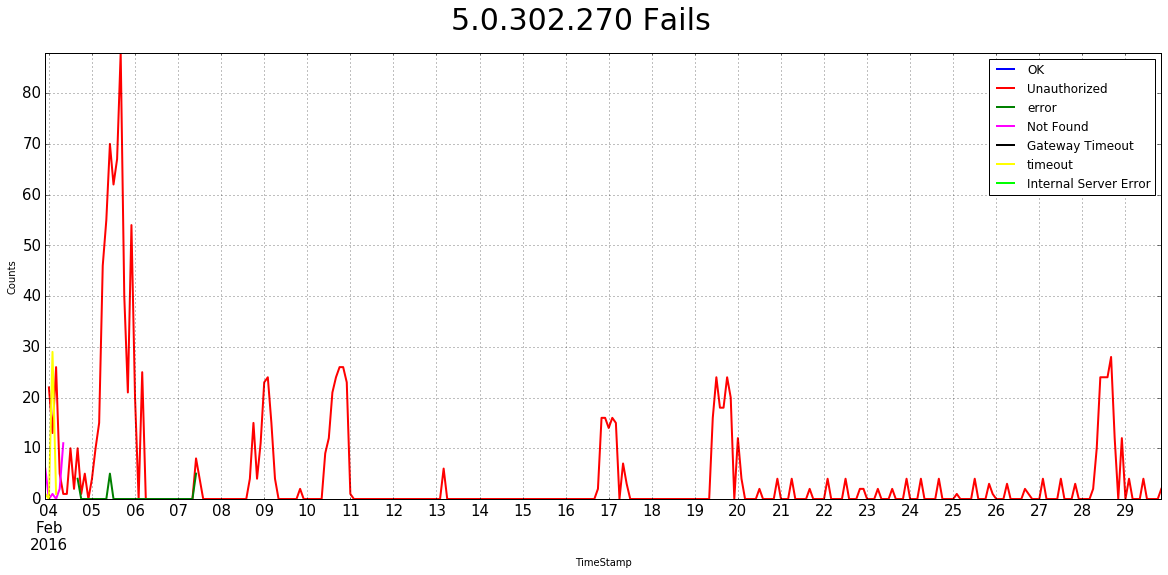

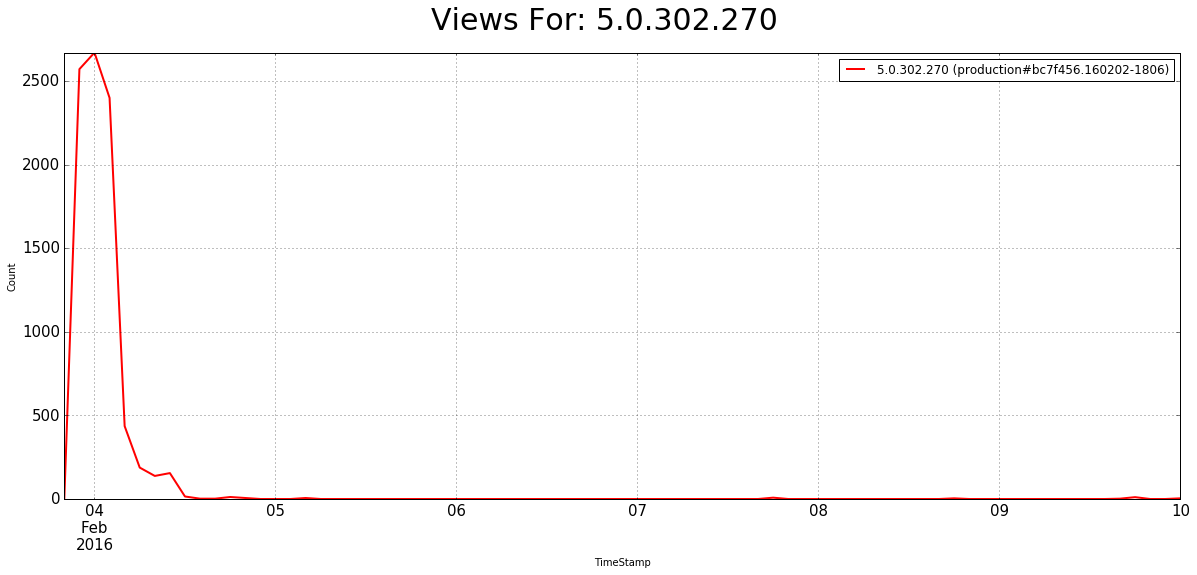

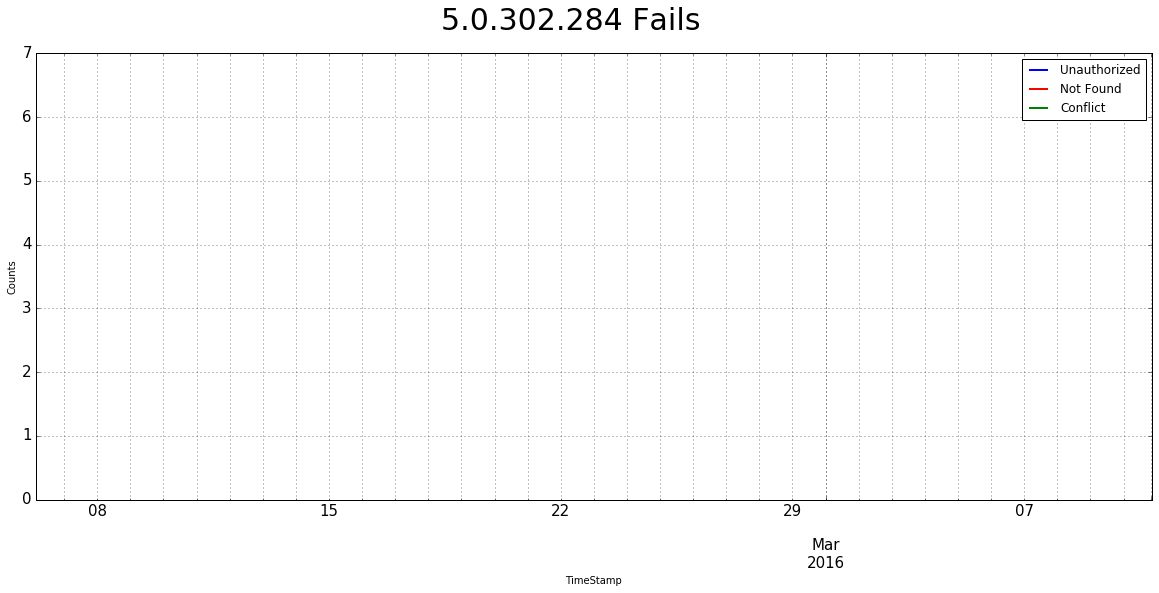

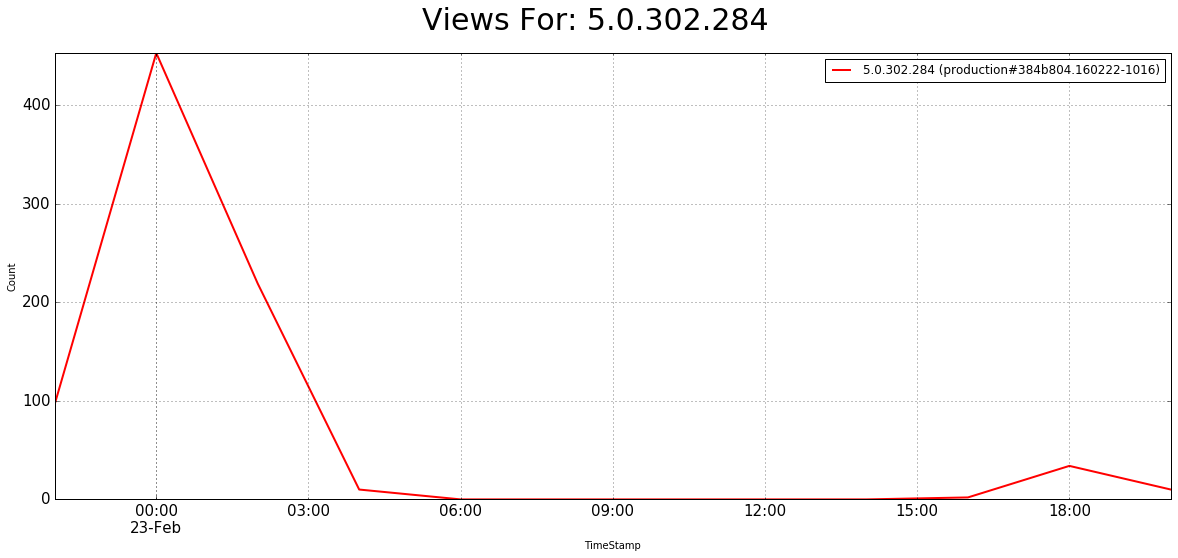

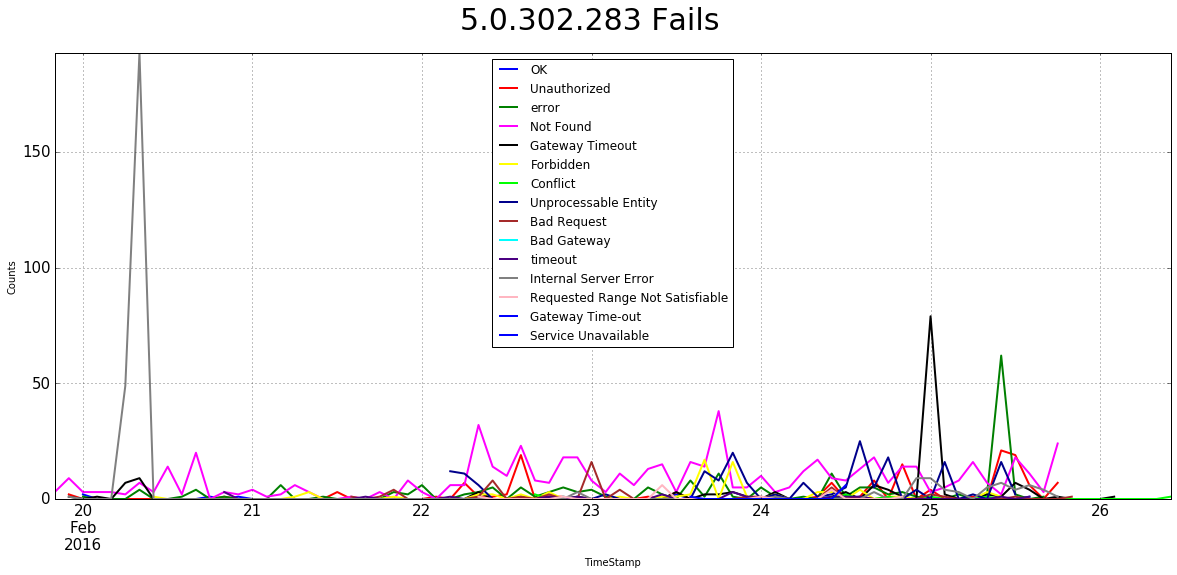

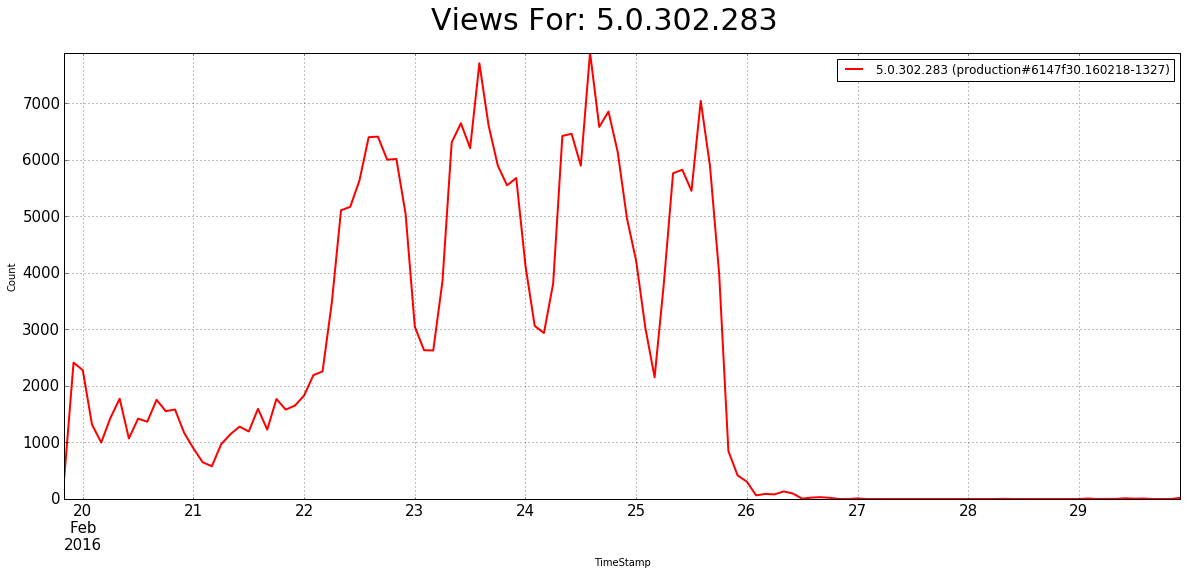

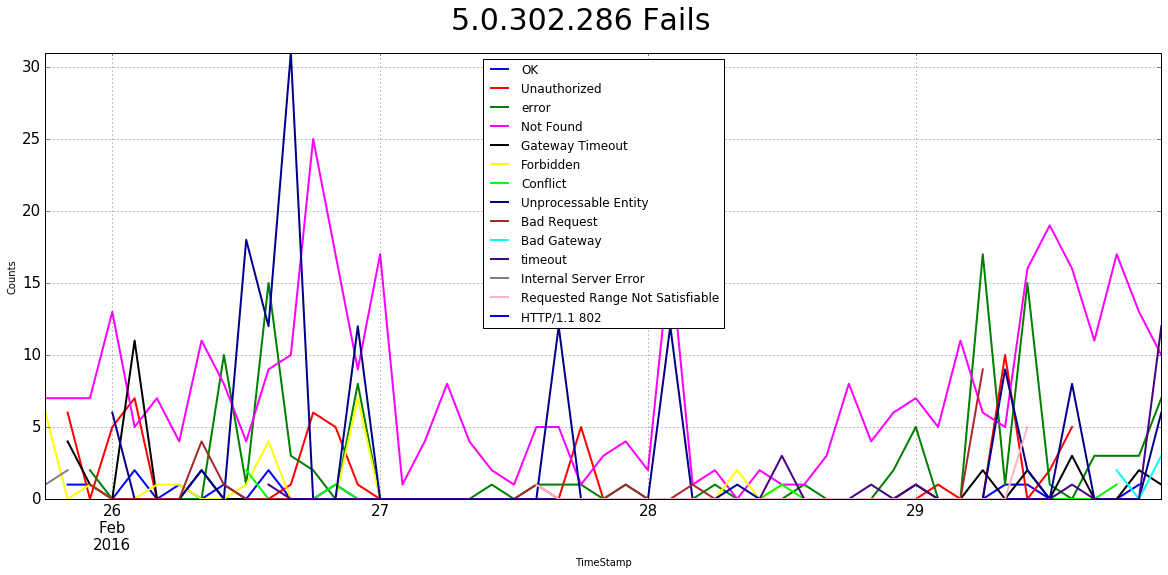

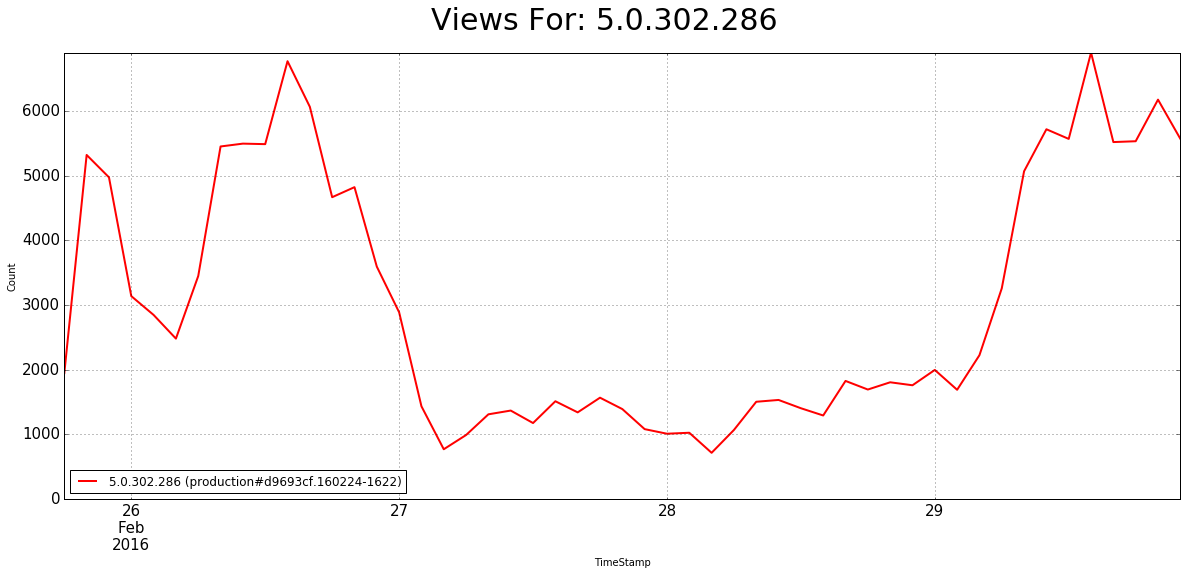

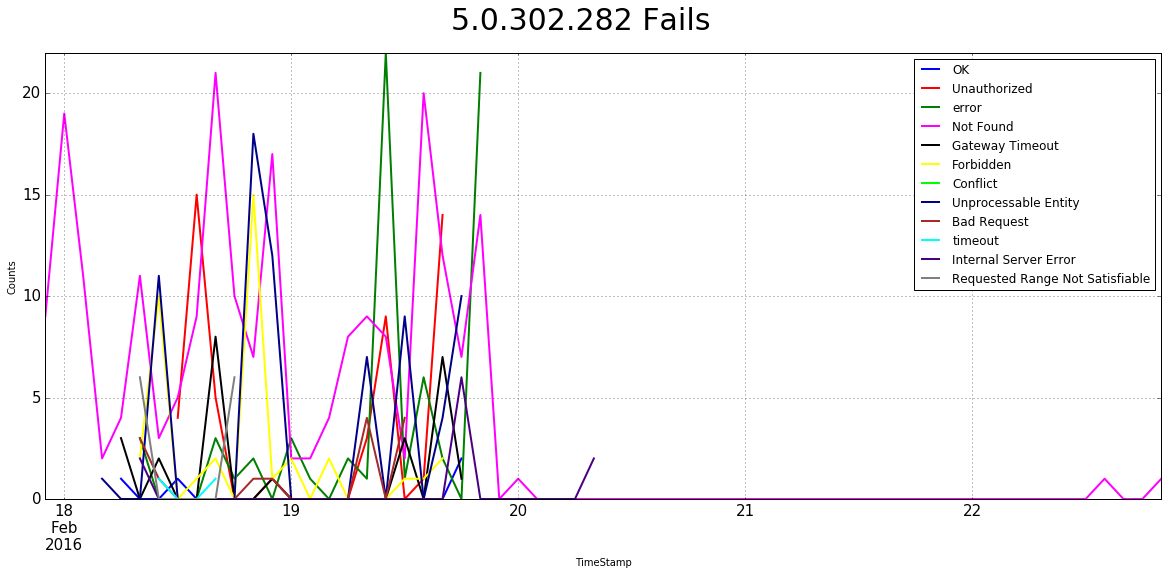

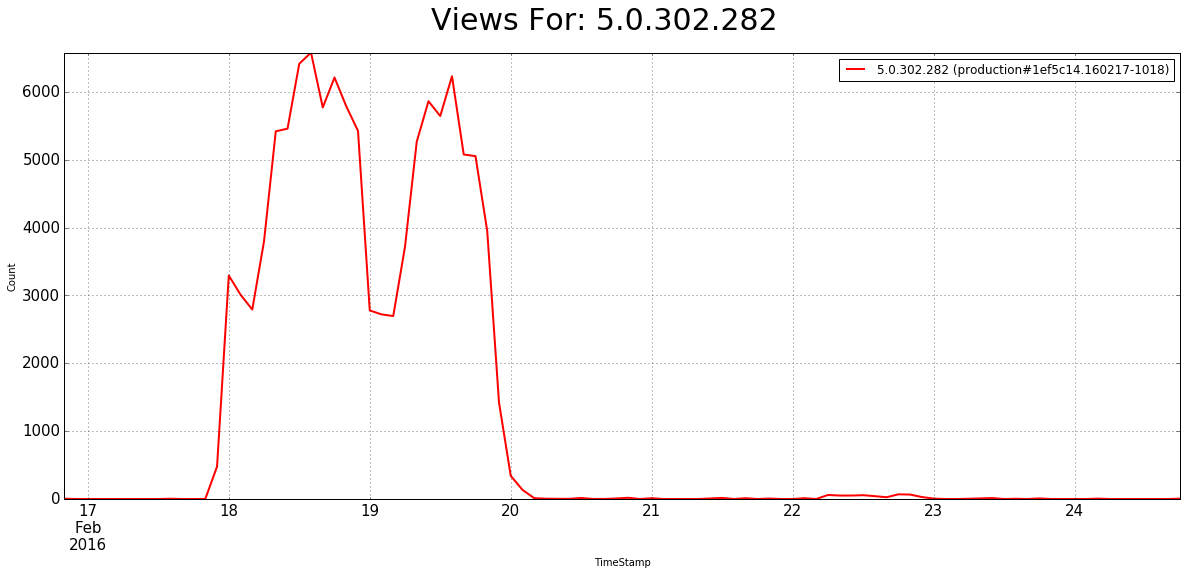

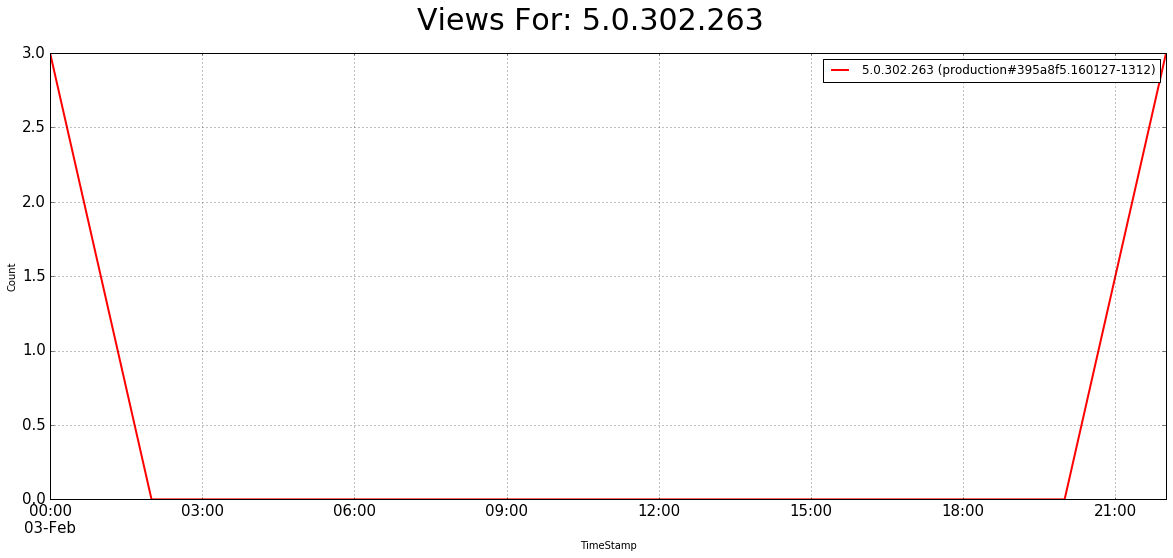

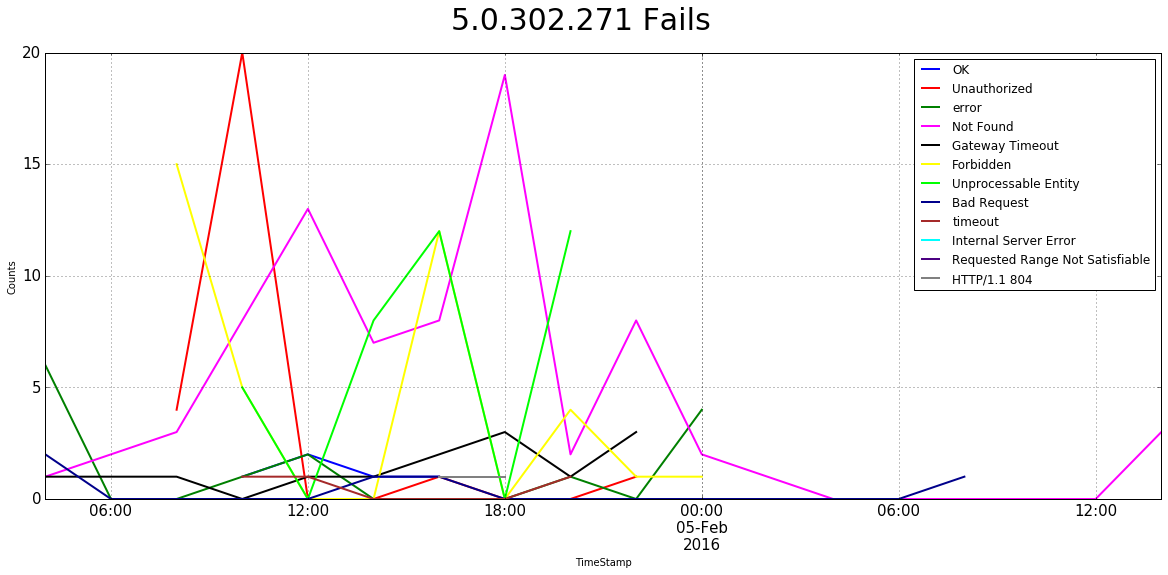

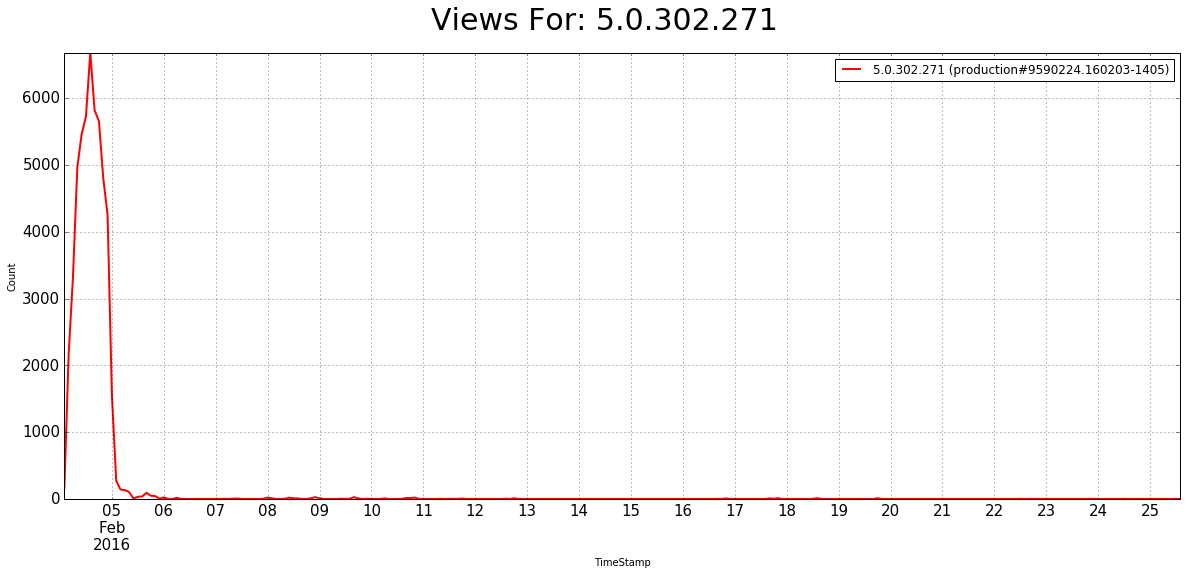

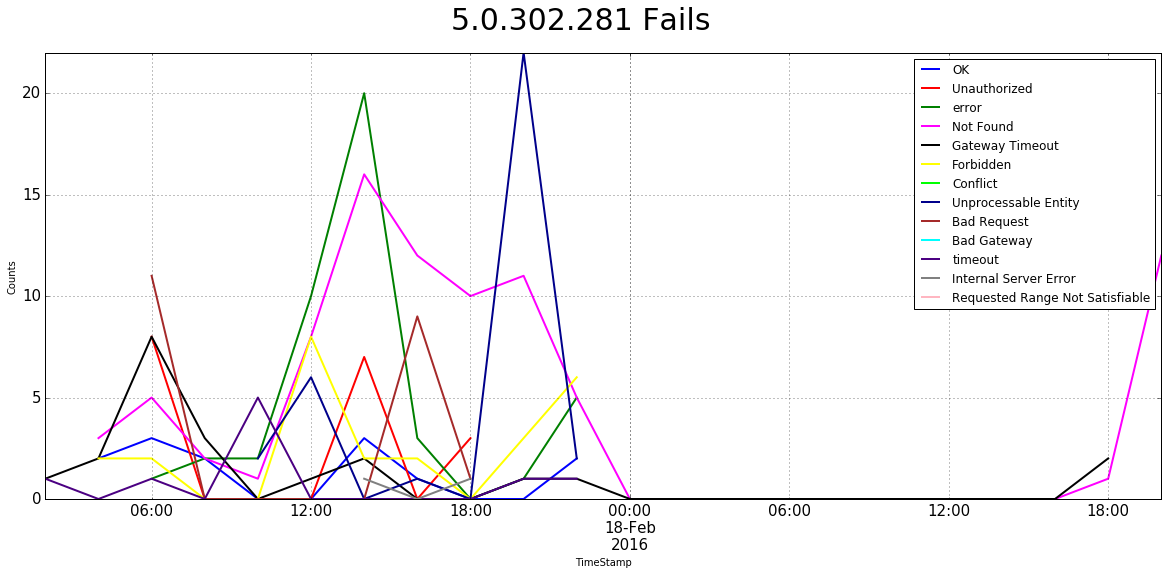

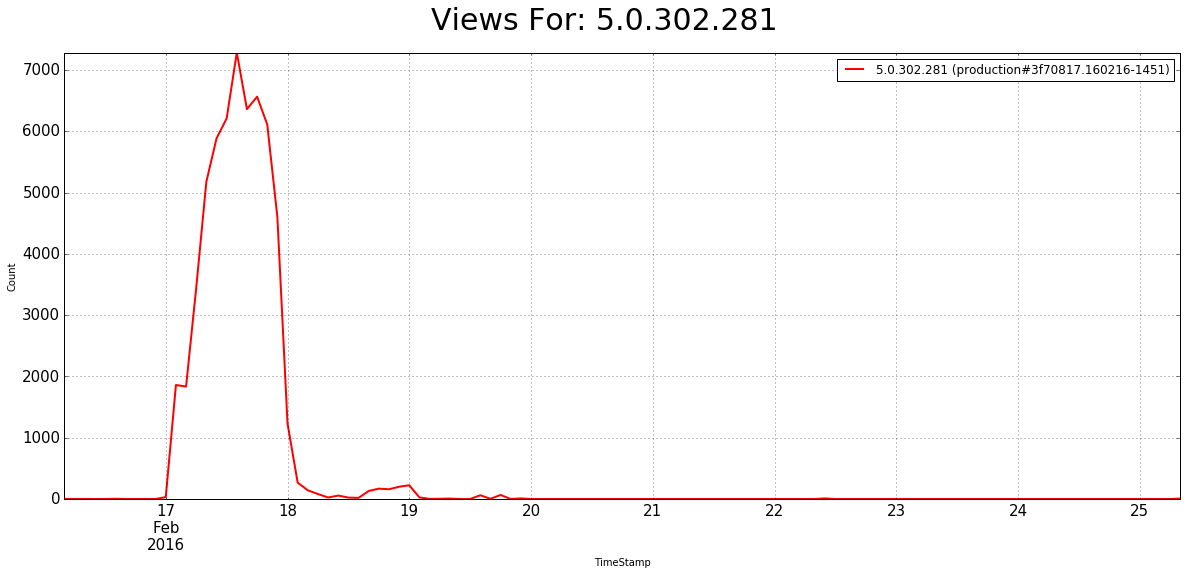

In [8]:
def plot_ver(df,ver,pp):
    ver_s = df.Start_Time[df.prod==ver]
    ver_e = df.End_Time[df.prod==ver]
    df_ajax = ajax.prep_data(general.load_df('ajax_events',ver_s,ver_e))
    df_views = general.load_df('views',ver_s,ver_e)
    ajax.plot_ajax_version_errors(df_ajax,"2h",ver,False)
    pp.savefig()
    views.plot_views_version(df_views,"2h",ver)
    pp.savefig()

def report(df,state):  
    pp = PdfPages(state +' Ver Report' + datetime.datetime.now().strftime("%Y-%m-%d") + '.pdf')
    for ver in df[df.Class==(1 if state=='Faulty' else 0)].index:
        plot_ver(df,ver,pp)
    pp.close()

report(df,'Faulty')
report(df,'Good')

## Save the new results

In [9]:
mining.add_new_labled_data(df)

## Re-train the BDT with new predictions for future versions

Training Set Confusion matrix
[[ 100.    0.]
 [   0.  100.]]
Testing Set Confusion matrix
[[ 100.            0.        ]
 [   3.57142857   66.66666667]]
Accuracy: Training= 100.0 , Testing= 96.7741935484


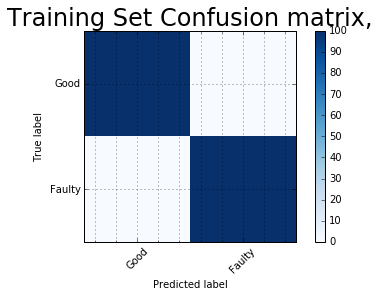

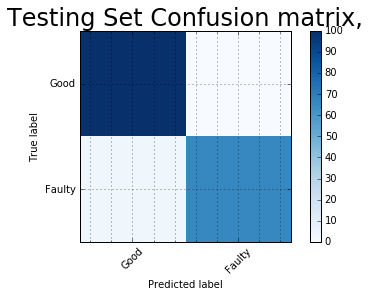

In [10]:
mva.train()